# MDI220: Statistics

# Getting started for the project

This notebook shows how to load and visualize data with Pandas on a simple example.

If you're not familiar with Python, check this set of [exercises](https://www.w3resource.com/python-exercises/).

If you're not familiar with Numpy, Pandas, Matplotlib, Seaborn, check this set of [notebooks](https://github.com/tbonald/python_data_science) inspired by the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html).


## Import

In [1]:
import pandas as pd

## Data

You first need to download datasets from eCampus.

In [2]:
from os import path

In [3]:
# check datasets
if not all([path.isfile(filename) for filename in ['power.txt', 'temperature.txt']]):
    print('Please download the datasets and save them in the working directory.')
else:
    print("You're ready!")

You're ready!


## Power consumption

Consider the evolution of [electric power consumption](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption) in Sceaux from December 2006 to November 2010.



We focus on the variable ```Global_active_power```.

In [4]:
df = pd.read_csv('power.txt', sep=';', usecols=['Date', 'Time', 'Global_active_power'], low_memory=False)

In [5]:
df.tail()

,Date,Time,Global_active_power
2075254,26/11/2010,20:58:00,0.946
2075255,26/11/2010,20:59:00,0.944
2075256,26/11/2010,21:00:00,0.938
2075257,26/11/2010,21:01:00,0.934
2075258,26/11/2010,21:02:00,0.932


In [6]:
df = df.rename(columns={'Global_active_power': 'Power'})

## To do

* Remove non-numerical values from the ``Power`` column.
* Use ``to_datetime`` and ``set_index`` to index the DataFrame by dates. 
* Show the evolution of daily average power in the period January-June 2010.


In [7]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [8]:
df_clean = df.dropna()

In [9]:
# fraction of valid values
len(df_clean) / len(df)

0.987481562542314

In [10]:
df = df_clean

In [11]:
df['Datetime'] = df.Date.astype(str) + ' ' + df.Time.astype(str)
df = df.drop(columns=['Date', 'Time'])

In [12]:
df.dtypes

Power       float64
Datetime     object
dtype: object

In [13]:
df['Datetime'] = pd.to_datetime(df['Datetime'], infer_datetime_format=True)

In [14]:
df.dtypes

Power              float64
Datetime    datetime64[ns]
dtype: object

In [15]:
# set index
df = df.set_index('Datetime')

In [16]:
df.head()

,Power
Datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [17]:
# daily average
df_power = df.resample('D').mean()

In [18]:
# rename index
df_power.index.name = 'Date'

In [19]:
# slicing
df_power['2007-01-01':'2007-01-07']

,Power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736


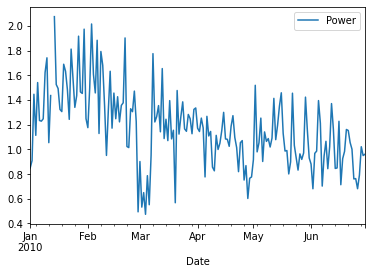

In [20]:
# plot from Jan 2010 to June 2010
df_power['2010-01-01':'2010-06-30'].plot();

## Temperatures

We now consider the evolution of temperatures. 

## To do

* Load data with ``pandas``and select columns ``DATE`` and ``TG``.
* Rename these columns as ``Date`` and ``Temperature``.
* Divide the column ``Temperature`` by 10 to get temperatures in degree Celsius. Remove anomalies.
* Build a  DataFrame of daily temperatures for the period January-June 2010.
* Display aligned plots with temperatures and power consumption.

In [21]:
df = pd.read_csv('temperature.txt', comment='#')

In [22]:
df.head()

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0


In [23]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [24]:
# remove spaces
df.columns = df.columns.str.replace(' ', '')

In [25]:
df = df[['DATE', 'TG']]

In [26]:
df = df.rename(columns={'DATE':'Date', 'TG':'Temperature'})

In [27]:
df.dtypes

Date           int64
Temperature    int64
dtype: object

In [28]:
df['Temperature'] = df['Temperature'].apply(lambda x: x/10);

In [29]:
df.head()

,Date,Temperature
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5


In [30]:
max(df['Temperature'])

31.6

In [31]:
min(df['Temperature'])

-999.9

In [32]:
df_clean = df[df['Temperature'] > -100]

In [33]:
# fraction of valid values
len(df_clean) / len(df)

0.7595676977324198

In [34]:
df = df_clean

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")

In [36]:
df.head()

,Date,Temperature
0,1921-03-01,5.0
1,1921-03-02,4.6
2,1921-03-03,4.6
3,1921-03-04,3.1
4,1921-03-05,9.5


In [37]:
# set index
df = df.set_index('Date')

In [38]:
df_temp = df

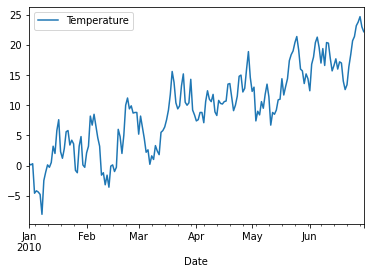

In [39]:
# plot from Jan 2010 to June 2010
df_temp['2010-01-01':'2010-06-30'].plot();

In [40]:
# merge
df = pd.merge(df_power, df_temp, left_index=True, right_index=True)

In [41]:
df.head()

,Power,Temperature
Date,,
2006-12-16,3.053475,6.0
2006-12-17,2.354486,2.8
2006-12-18,1.530435,3.5
2006-12-19,1.157079,2.4
2006-12-20,1.545658,3.0


In [42]:
df.dtypes

Power          float64
Temperature    float64
dtype: object

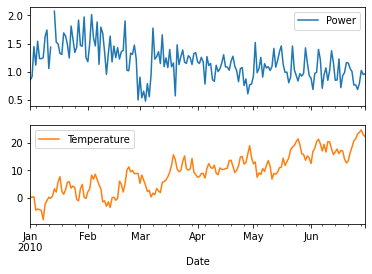

In [43]:
df['2010-01-01':'2010-06-30'].plot(subplots=True);